<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

### **TAREA: CNN (Red Neuronal Convolucional)**

*29 de Noviembre de 2024*

**Nombre Estudiante(s)**: Juan Ugalde - Victor Saldivia - Joaquin Leiva

### **INTRODUCCIÓN**

En esta tarea, el objetivo es comparar el rendimiento de dos arquitecturas de redes neuronales 
en un problema de clasificación binaria: Muffins vs Chihuahuas. 

El próposito de la tarea es:
1. Aplicar un Perceptrón Multicapa (MLP) para clasificar imágenes.
2. Implementar una Red Neuronal Convolucional (CNN) para resolver el mismo problema.
3. Comparar el rendimiento de ambas arquitecturas en términos de precisión y pérdida.

### **OBJETIVOS**

**Objetivo General**  
Evaluar el desempeño de dos enfoques distintos de redes neuronales aplicados a un problema 
de clasificación de imágenes.

**Objetivos Específicos**
- Diseñar y entrenar un modelo MLP y otro CNN utilizando técnicas de aumento de datos.
- Analizar la evolución de las métricas de precisión y pérdida durante el entrenamiento.
- Evaluar ambos modelos en un conjunto de prueba para determinar cuál ofrece mejor rendimiento.
- Obtener conclusiones con base en la comparación de resultados.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from sklearn.metrics import classification_report, confusion_matrix

### **PREPROCESAMIENTO DE DATOS**

En esta sección, preparamos el conjunto de datos para su uso en el modelo. 
Esto incluye:
- La normalización de los valores de píxeles al rango [0, 1].
- La división del conjunto de datos en entrenamiento, validación y prueba.
- La aplicación de técnicas de aumento de datos, como rotaciones, desplazamientos y zoom.
Estas acciones aseguran que el modelo reciba datos consistentes y variados para mejorar su capacidad de generalización.


#### **Descomprimir Archivo**

In [2]:
dataset_path = './data/archive.zip'

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('./data')

In [3]:
# Definición de rutas de los datos
base_dir = './data/train'
test_dir = './data/test'

# Generador de datos con normalización y aumento de datos
datagen = ImageDataGenerator(
    rescale=1./255,  # Escala los valores de píxeles a [0, 1]
    validation_split=0.2,  # Divide los datos en entrenamiento y validación
    rotation_range=20,  # Rotación aleatoria de hasta 20 grados
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio
    horizontal_flip=True,  # Volteo horizontal
    zoom_range=0.2  # Zoom aleatorio
)

# Generador de datos para el conjunto de entrenamiento
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # Redimensiona las imágenes a 128 x 128 píxeles
    batch_size=64,
    class_mode='binary',  # Clasificación binaria: muffin (0) o chihuahua (1)
    subset='training'
)

# Generador de datos para el conjunto de validación
val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)

# Generador de datos para el conjunto de prueba (sin aumento de datos)
test_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalización
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

Found 3788 images belonging to 2 classes.
Found 945 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


### **VISUALIZACIÓN DE IMÁGENES AUMENTADAS**

En esta parte se muestran ejemplos de imágenes generadas mediante el aumento de datos. 
Esto se hace para verificar si las técnicas de preprocesamiento, como rotaciones y desplazamientos, se aplicaron correctamente.

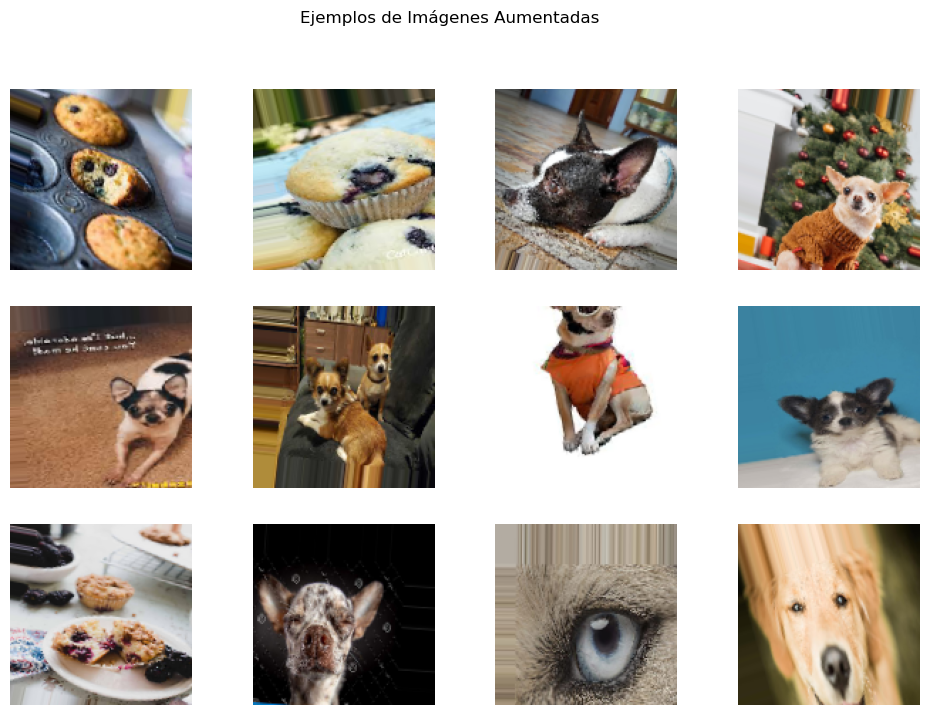

In [5]:
sample_images, _ = next(train_data)
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.suptitle('Ejemplos de Imágenes Aumentadas')
plt.show()

### **MODELO PERCEPTRÓN MULTICAPA (MLP)**

#### **Entrenamiento del Modelo Perceptrón Multicapa**

#### **Visualización del Rendimiento del Modelo**

#### **Evaluación del Modelo MLP**

### **MODELO CONVOLUCIONAL**